# PCS5024 Aprendizado Estatístico - Atividade 1

Essa atividade consiste na criação de um classificador para o dataset Adult.

Etapas:

1. Obtenção dos dados
2. Análise dos atributos e características do dataset
3. Criação de um classificador KNN para a variável ">50k"
4. Apresentação da acurácia, precisão e recall para o melhor classificador


### Bibliotecas utilizadas:


```
asttokens==3.0.0
comm==0.2.2
contourpy==1.3.1
cycler==0.12.1
debugpy==1.8.13
decorator==5.2.1
exceptiongroup==1.2.2
executing==2.2.0
fonttools==4.56.0
ipykernel==6.29.5
ipython==8.34.0
jedi==0.19.2
joblib==1.4.2
jupyter_client==8.6.3
jupyter_core==5.7.2
kiwisolver==1.4.8
matplotlib==3.10.1
matplotlib-inline==0.1.7
nest-asyncio==1.6.0
numpy==1.23.5
packaging==24.2
pandas==2.2.3
parso==0.8.4
pexpect==4.9.0
pillow==11.1.0
platformdirs==4.3.7
prompt_toolkit==3.0.50
psutil==7.0.0
ptyprocess==0.7.0
pure_eval==0.2.3
Pygments==2.19.1
pyparsing==3.2.2
python-dateutil==2.9.0.post0
pytz==2025.1
pyzmq==26.3.0
scikit-learn==1.1.3
scipy==1.15.2
seaborn==0.13.2
six==1.17.0
stack-data==0.6.3
threadpoolctl==3.6.0
tornado==6.4.2
traitlets==5.14.3
typing_extensions==4.12.2
tzdata==2025.2
wcwidth==0.2.13
```


## Obtenção dos dados


Nos dados obtidos da [base da UCI](https://archive.ics.uci.edu/dataset/2/adult), podemos encontrar um arquivo `adult.data` e outro `adult.test`. O arquivo `adult.test` contém dados que serão utilizados para teste, após a criação dos classificadores.


In [1]:
import pandas as pd

# Read training data
train = pd.read_csv(
    "data/uci/adult.data",
    names=[
        "age",
        "workclass",
        "fnlwgt",
        "education",
        "education-num",
        "marital-status",
        "occupation",
        "relationship",
        "race",
        "sex",
        "capital-gain",
        "capital-loss",
        "hours-per-week",
        "native-country",
        "income",
    ],
)

In [2]:
# Read test data
test = pd.read_csv(
    "data/uci/adult.test",
    skiprows=1,
    names=[
        "age",
        "workclass",
        "fnlwgt",
        "education",
        "education-num",
        "marital-status",
        "occupation",
        "relationship",
        "race",
        "sex",
        "capital-gain",
        "capital-loss",
        "hours-per-week",
        "native-country",
        "income",
    ],
)

# Remove trailing "." from income column
test["income"] = test["income"].str.strip(".")

In [3]:
## REMOVE THIS CELL BEFORE SUBMISSION
# train = train.sample(n=100, random_state=42)

## Análise dos atributos


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

### Distribuição dos atributos


#### Age


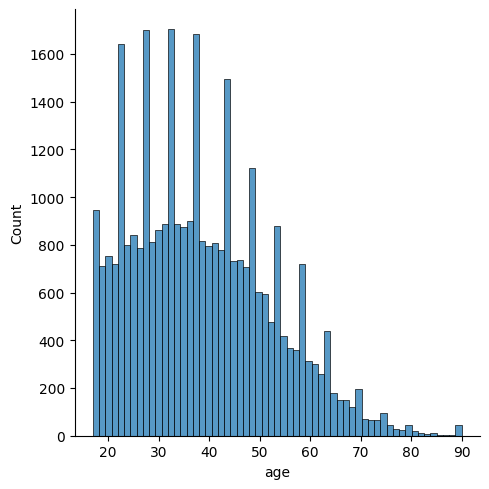

In [5]:
sns.displot(train["age"])

#### Workclass


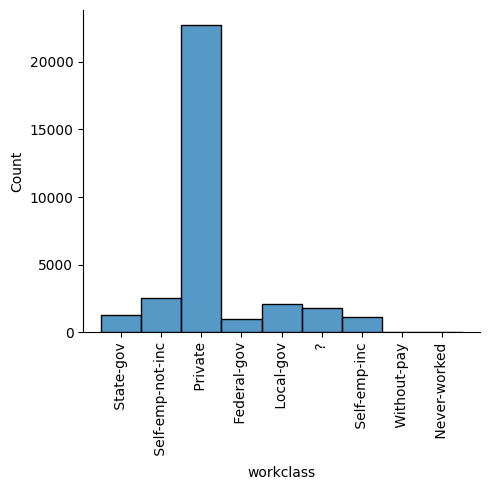

In [6]:
sns.displot(train["workclass"])
plt.xticks(rotation=90)  # Rotate x-axis labels
plt.tight_layout()  # Prevent clipping of labels
plt.show()

#### fnlwgt


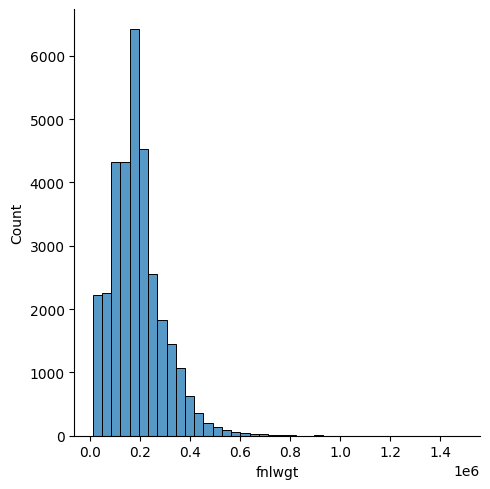

In [7]:
sns.displot(train["fnlwgt"], bins=40)

#### Education


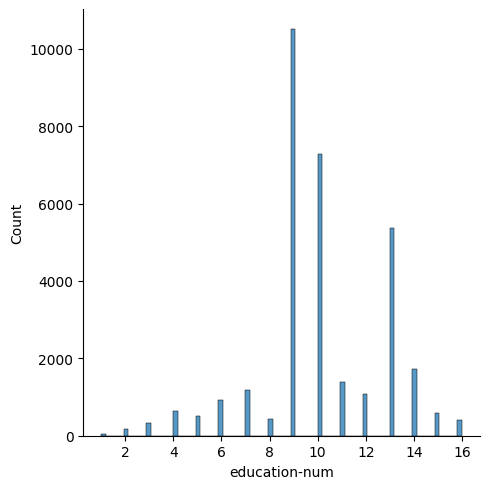

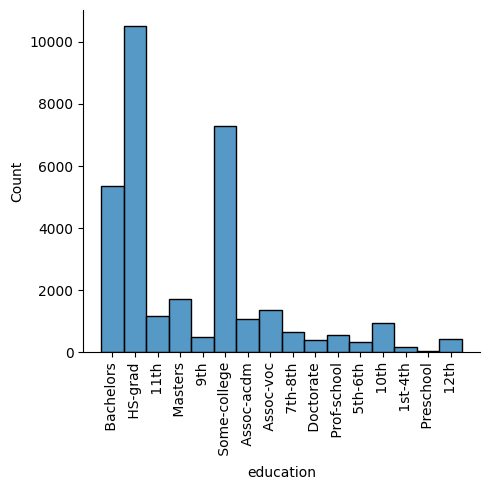

In [8]:
sns.displot(train["education-num"])
sns.displot(train["education"])
plt.xticks(rotation=90)  # Rotate x-axis labels
plt.tight_layout()  # Prevent clipping of labels
plt.show()

#### Marital Status


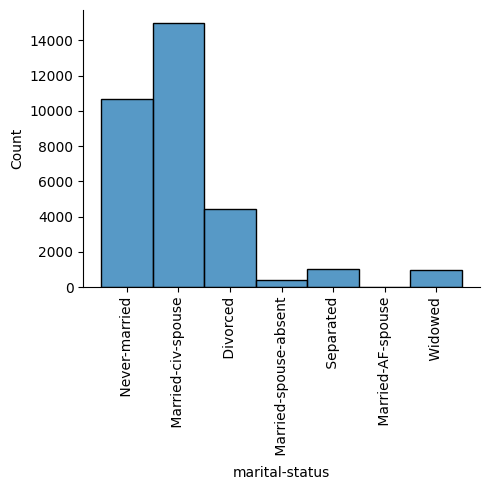

In [9]:
sns.displot(train["marital-status"])
plt.xticks(rotation=90)  # Rotate x-axis labels
plt.tight_layout()  # Prevent clipping of labels
plt.show()

#### Occupation


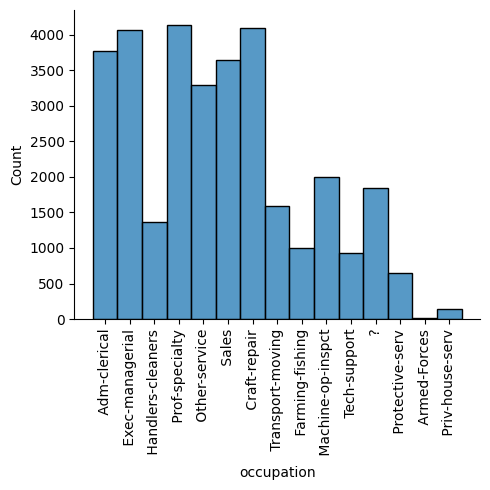

In [10]:
sns.displot(train["occupation"])
plt.xticks(rotation=90)  # Rotate x-axis labels
plt.tight_layout()  # Prevent clipping of labels
plt.show()

#### Relationship


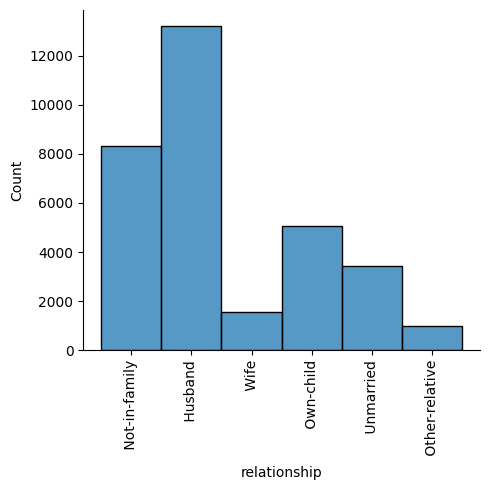

In [11]:
sns.displot(train["relationship"])
plt.xticks(rotation=90)  # Rotate x-axis labels
plt.tight_layout()  # Prevent clipping of labels
plt.show()

#### Race


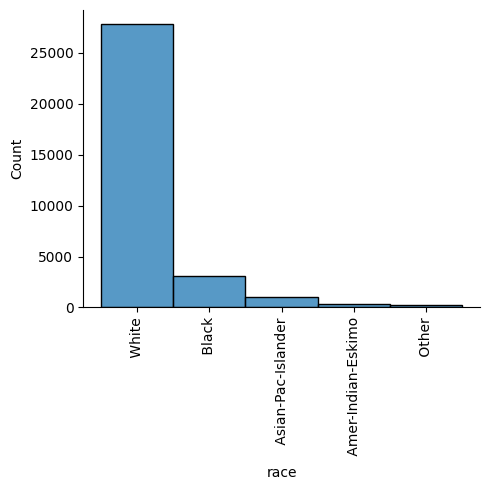

In [12]:
sns.displot(train["race"])
plt.xticks(rotation=90)  # Rotate x-axis labels
plt.tight_layout()  # Prevent clipping of labels
plt.show()

#### Sex


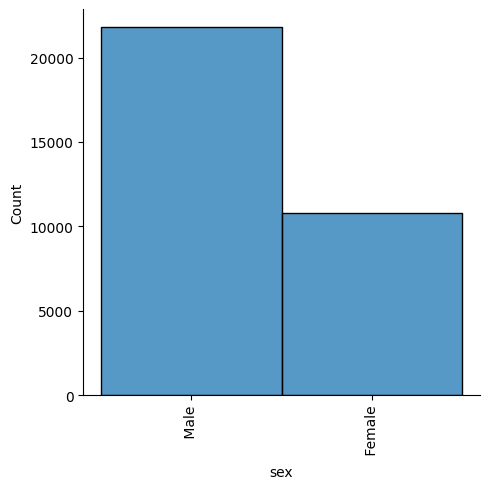

In [13]:
sns.displot(train["sex"])
plt.xticks(rotation=90)  # Rotate x-axis labels
plt.tight_layout()  # Prevent clipping of labels
plt.show()

#### Capital-gain


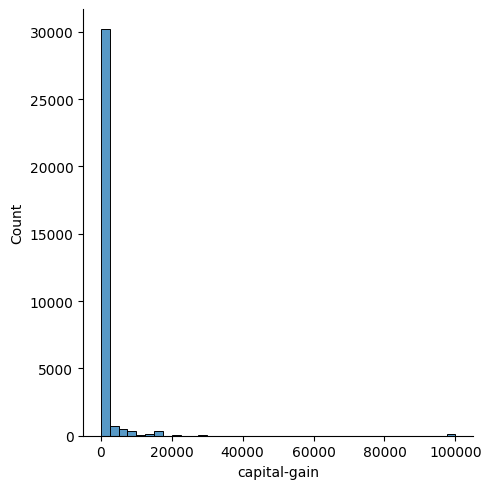

In [14]:
sns.displot(train["capital-gain"], bins=40)
plt.show()

Podemos notar pela distribuição acima que a variável capital-gain possui outliers.


#### Capital-loss


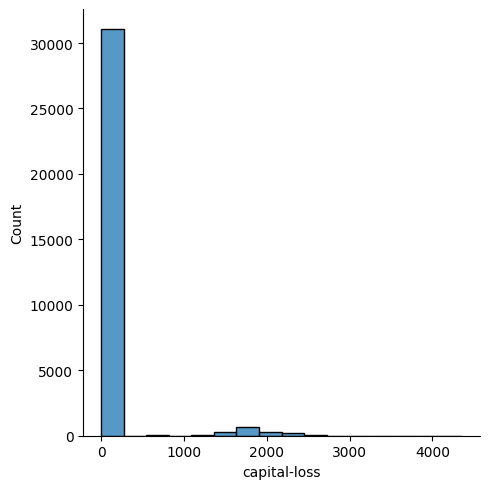

In [15]:
sns.displot(train["capital-loss"])
plt.show()

#### Hours-per-week


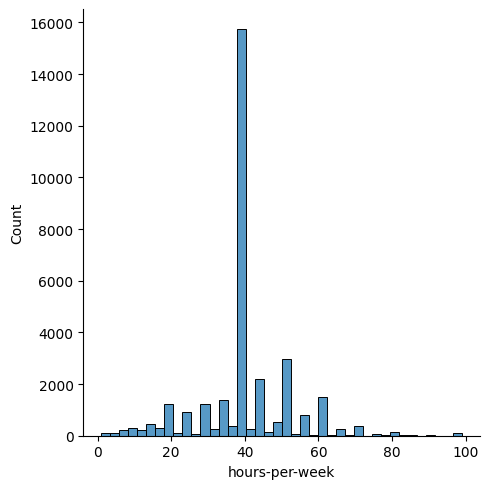

In [16]:
sns.displot(train["hours-per-week"], bins=40)
plt.show()

#### Native-country


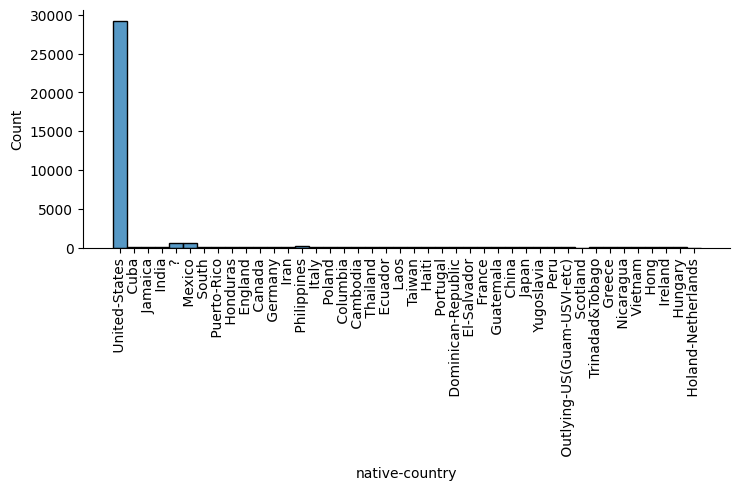

In [17]:
sns.displot(train["native-country"], aspect=1.5)
plt.xticks(rotation=90)  # Rotate x-axis labels
plt.tight_layout()  # Prevent clipping of labels
plt.show()

### Correlação


Vamos observar também a correlação entre os atributos. Caso algum atributo tenha correlação muito alta, isso pode nos indicar que ele é um bom candidato a ser removido da nossa base de dados. Além disso, também observaremos a correlação dos atributos com a variável de interesse "income". Uma correlação baixa nesse caso também pode significar que esse atributo não tem um impacto grande e pode ser considerado para ser removido da base de treinamento.

> Observação: a correlação só é feita entre dados numéricos, portanto, a variável "income" será transformada para valores "0" e "1" para essa etapa.


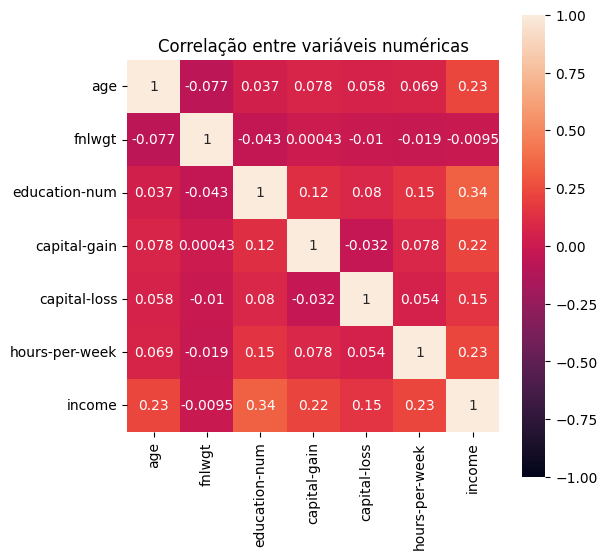

In [18]:
import numpy as np


from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_analysis = train.copy()
df_analysis["income"] = le.fit_transform(df_analysis["income"])

# Select numerical features
df_analysis_numeric = df_analysis.select_dtypes(include=[np.number])

# Plot correlation
plt.figure(figsize=(6, 6))
sns.heatmap(
    df_analysis_numeric.corr(),
    square=True,
    annot=True,
    vmin=-1,
    vmax=1,
)
plt.title("Correlação entre variáveis numéricas")
plt.show()

Pelo gráfico acima, podemos observar que o atributo "fnlwgt" tem correlação quase nula com a variável de interesse "income", e inclusive tem correlação muito baixa com todas as outras variáveis. Por conta disso, ele pode ser um candidato a ser removido.


### Dados faltantes

Será necessário lidar com os dados faltantes na base de dados antes de poder utilizá-la para o treinamento. No caso da base obtida, muitos dados possuem o valor " ?", que será considerado como dado faltante. Abaixo é apresentada a contagem desses dados faltantes para as bases de treino e teste.


In [19]:
# Replace ? with nan
train = train.replace(" ?", np.nan)
test = test.replace(" ?", np.nan)
train.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [20]:
test.isna().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

Podemos ver pelas células acima que alguns atributos (workclass, occupation e native-country) possuem dados faltantes. Vamos substituí-los utilizando o `SimpleImputer`, que, com a estratégia `"most-frequent"` irá substituir os dados faltantes pelo dado mais frequente daquele atributo. Como iremos aplicar outras transformações aos dados de treino e teste, juntaremos todas em um obeto `Pipeline` posteriormente.


### Redimensionamento dos dados

Alguns dados numéricos possuem outliers de valor muito elevado, como vimos na seção de distribuição dos dados. Para que esses outliers não influenciem o treinamento do classificador de maneira desbalanceada, podemos redimensionar os dados utilizando os objetos `SimpleScaler`,


### Juntando tudo

Vamos agora juntar os passos de pré-processamento que acabamos de descrever em um único objeto.


In [21]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer


def create_preprocessor(X_train):

    # Separate each type of feature by column
    numerical_cols = list(X_train.select_dtypes(include=[np.number]).columns.values)

    sparse_cols = []
    if "capital-gain" in numerical_cols:
        numerical_cols.remove("capital-gain")
        sparse_cols.append("capital-gain")
    if "capital-loss" in numerical_cols:
        numerical_cols.remove("capital-loss")
        sparse_cols.append("capital-loss")

    categorical_cols = list(X_train.select_dtypes(exclude=[np.number]).columns.values)

    # Create preprocessing pipelines for each type of feature
    categorical_pipe = Pipeline(
        [
            ("impute", SimpleImputer(strategy="most_frequent")),
            ("encode", OneHotEncoder(handle_unknown="ignore")),
        ]
    )
    numerical_pipe = Pipeline(
        [
            ("scale", StandardScaler()),
        ]
    )
    sparse_pipe = Pipeline(
        [
            ("scale", RobustScaler(with_centering=False)),
        ]
    )

    # Merge everything in a Column Transformer
    preprocessor = ColumnTransformer(
        transformers=[
            ("num", numerical_pipe, numerical_cols),
            ("spr", sparse_pipe, sparse_cols),
            ("cat", categorical_pipe, categorical_cols),
        ]
    )

    return preprocessor


y_train = train["income"].values
X_train = train.drop(columns=["income"])

preprocessor = create_preprocessor(X_train)

## Criação do classificador KNN


### Treinamento

<!-- Para treinar um classificador KNN, vamos primeiro separar a base de dados de treino em atributos (X) e variável de interesse (y) -->


Vamos criar uma pipeline contendo tanto o pré-processador quanto o classificador KNN.


In [22]:
from sklearn.neighbors import KNeighborsClassifier

estimation_pipe = Pipeline(
    [("preprocess", preprocessor), ("knn", KNeighborsClassifier())]
)

Vamos utilizar o objeto `GridSearchCV` para fazer a validação cruzada do nosso modelo variando o hiperparâmetro `knn__n_neighbors` para encontrarmos o melhor valor para o número de vizinhos para nosso classificador.

> Obs: foram utilizados mais de um núcleo do processador para executar a validação cruzada. Isso pode causar erros de **segmentation fault** dependendo da memória do sistema. Caso isso ocorra, reduza o valor de `n_jobs`

In [23]:
from sklearn.model_selection import GridSearchCV


def run_cv(estimation_pipe, X_train, y_train):
    cv = GridSearchCV(
        estimator=estimation_pipe,
        param_grid={
            "knn__n_neighbors": [
                i for i in range(15, 25)
            ]  # Note: larger tests were made to find the best value for n_neighbors. However, since training would take a long time, a reduced range was used for the demonstration, taking into consideration the best value obtained previously.
        },  # check these values for number of neighbors in the estimator
        cv=3,  # 3-fold cross validation
        scoring="accuracy",  # Use accuracy as a score measure
        n_jobs=16,  # Run on multiple cores - may cause seg fault due to memory usage. Comment this line if that happens, or try a smaller number of jobs.
    )

    cv.fit(X_train, y_train)
    return cv

In [24]:
cv = run_cv(estimation_pipe, X_train, y_train)
results_df = pd.DataFrame(cv.cv_results_)

In [25]:
results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_knn__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.128847,0.001786,12.486320,0.106639,15,{'knn__n_neighbors': 15},0.858393,0.861434,0.867410,0.862412,0.003746,6
1,0.128305,0.001278,12.451781,0.111031,16,{'knn__n_neighbors': 16},0.858117,0.862355,0.868239,0.862904,0.004151,4
2,0.127911,0.002829,12.509861,0.055330,17,{'knn__n_neighbors': 17},0.858209,0.861710,0.867134,0.862351,0.003672,7
3,0.128455,0.002076,12.558024,0.125040,18,{'knn__n_neighbors': 18},0.858670,0.862816,0.868147,0.863211,0.003879,1
4,0.125934,0.001026,12.554394,0.032604,19,{'knn__n_neighbors': 19},0.857564,0.861065,0.866673,0.861767,0.003752,10
5,0.131362,0.003818,12.095455,0.325871,20,{'knn__n_neighbors': 20},0.859315,0.862263,0.867778,0.863119,0.003508,3
6,0.147972,0.018558,11.969194,0.144724,21,{'knn__n_neighbors': 21},0.860236,0.861249,0.865844,0.862443,0.002440,5
7,0.127834,0.002350,12.046653,0.039845,22,{'knn__n_neighbors': 22},0.859315,0.861894,0.865659,0.862289,0.002605,8
8,0.129384,0.009592,12.059798,0.172807,23,{'knn__n_neighbors': 23},0.859591,0.860604,0.866028,0.862074,0.002826,9
9,0.122112,0.001129,12.067153,0.066821,24,{'knn__n_neighbors': 24},0.860697,0.862723,0.866028,0.863149,0.002197,2


Para visualizar melhor o resultado da acurácia de cada classificador, vamos utilizar as informações da tabela acima para criar um gráfico


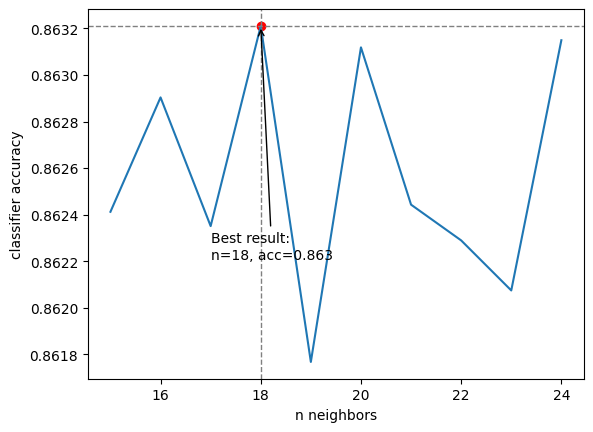

In [26]:
# Plot all classifiers
plt.plot(cv.cv_results_["param_knn__n_neighbors"], cv.cv_results_["mean_test_score"])


# Plot dot on best classifier
results_df = pd.DataFrame(cv.cv_results_)
winner = results_df[results_df["rank_test_score"] == 1].iloc[0]
n_neighbors = winner["param_knn__n_neighbors"]
score = winner["mean_test_score"]
plt.scatter(n_neighbors, score, color="r")

# Add lines to axes
plt.axhline(score, color="gray", linestyle="--", linewidth=1)
plt.axvline(n_neighbors, color="gray", linestyle="--", linewidth=1)

# Annotate the best point
plt.annotate(
    f"Best result:\nn={n_neighbors}, acc={score:.3f}",
    xy=(n_neighbors, score),
    xytext=(n_neighbors - 1, score - 0.001),
    arrowprops=dict(arrowstyle="->", color="black"),
    fontsize=10,
)

plt.xlabel("n neighbors")
plt.ylabel("classifier accuracy")
plt.show()

### Ablação

Podemos agora fazer um estudo de ablação, no qual removemos atributos ou componentes do sistema um por vês para verificar o impacto na qualidade do classificador. Para essa atividade, será realizada apenas a ablação de atributos, pois o sistema não tem tantos componentes.


#### Atributos

Vamos remover um atributo dos nossos dados por vez, e verificar o quanto isso impacta na acurácia do modelo.


In [27]:
def run_feature_ablation(X_train, y_train):
    ablation_results = []

    # Create a classifier with all columns
    preprocessor = create_preprocessor(X_train)
    estimation_pipe = Pipeline(
        [("preprocess", preprocessor), ("knn", KNeighborsClassifier())]
    )

    # Run cross-validation without this attribute and save result
    cv = run_cv(estimation_pipe, X_train, y_train)

    # Add result of full cross-validation to the ablation results
    ablation_results.append({"cv": cv, "removed_column": "none"})

    # Remove one column at a time and create new classifiers
    for column in X_train.columns:
        # Remove one column from training attributes
        X_ablation = X_train.drop(columns=[column], inplace=False)

        preprocessor_ablation = create_preprocessor(X_ablation)
        estimation_pipe_ablation = Pipeline(
            [("preprocess", preprocessor_ablation), ("knn", KNeighborsClassifier())]
        )

        # Run cross-validation without this attribute and save result
        cv = run_cv(estimation_pipe_ablation, X_ablation, y_train)
        ablation_results.append({"cv": cv, "removed_column": column})
    return ablation_results

In [28]:
ablation_results = run_feature_ablation(X_train, y_train)

In [29]:
# Find the result with the highest accuracy
best_result = max(ablation_results, key=lambda x: x["cv"].best_score_)

In [30]:
print(best_result["cv"].best_score_)
print(best_result["cv"].best_params_)
print(best_result["removed_column"])

0.8654527000530786
{'knn__n_neighbors': 18}
education


In [31]:
best_result["cv"]

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scale',
                                                                                          StandardScaler())]),
                                                                         ['age',
                                                                          'fnlwgt',
                                                                          'education-num',
                                                                          'hours-per-week']),
                                                                        ('spr',
                                                                         Pipeline(steps=[('scale',
                                                                                          RobustScaler(with_centering=False))]),
                                                                         ['capital-gain',
                                                                          'capital-loss']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('encode',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['workclass',
                                                                          'marital-status',
                                                                          'occupation',
                                                                          'relationship',
                                                                          'race',
                                                                          'sex',
                                                                          'native-country'])])),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=16,
             param_grid={'knn__n_neighbors': [15, 16, 17, 18, 19, 20, 21, 22,
                                              23, 24]},
             scoring='accuracy')

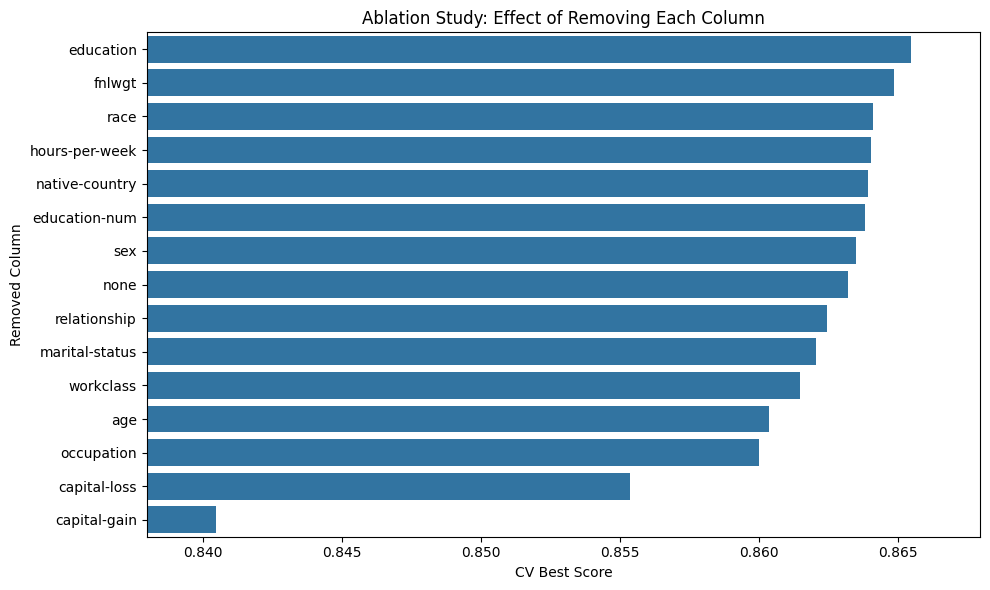

In [32]:
removed_columns = []
scores = []
for i in range(len(ablation_results)):
    removed_columns.append(ablation_results[i]["removed_column"])
    scores.append(ablation_results[i]["cv"].best_score_)

removed_columns_df = pd.DataFrame(
    {"Removed Column": removed_columns, "CV Best Score": scores}
).sort_values(by="CV Best Score", ascending=False)
# Set limits just around your data range with a small margin
min_score = min(scores)
max_score = max(scores)
margin = (max_score - min_score) * 0.1  # 10% margin

plt.figure(figsize=(10, 6))
sns.barplot(data=removed_columns_df, y="Removed Column", x="CV Best Score")
plt.xlim(min_score - margin, max_score + margin)
plt.title("Ablation Study: Effect of Removing Each Column")
plt.tight_layout()
plt.show()

Tendo em vista o resultado obtido no treinamento ao retirar cada atributo, vamos repetir o estudo de ablação novamente, agora para datasets já com um atributo removido. Faremos isso para os três primeiros atributos que apresentaram menor impacto ao serem removidos da base de dados.


In [33]:
# Select 3 first rows of "Removed Column" that are not "none"
initial_removed_columns = (
    removed_columns_df[removed_columns_df["Removed Column"] != "none"]
    .head(3)["Removed Column"]
    .values
)
initial_removed_columns

array(['education', 'fnlwgt', 'race'], dtype=object)

In [34]:
# Run ablation study after removing each of the previously selected columns
ablation_results_list = []
for initial_removed_column in initial_removed_columns:
    # Remove one of the features from the dataset
    X_initial = X_train.drop(columns=[initial_removed_column], inplace=False)

    ablation_result = run_feature_ablation(X_initial, y_train)
    ablation_results_list.append(
        {"removed_column": initial_removed_column, "ablation_results": ablation_result}
    )

In [35]:
for ablation_result in ablation_results_list:
    print("Initial removed column:", ablation_result["removed_column"])

    best_result = max(
        ablation_result["ablation_results"], key=lambda x: x["cv"].best_score_
    )

    print("\tBest score:", best_result["cv"].best_score_)
    print("\tExtra removed column:", best_result["removed_column"])

Initial removed column: education
	Best score: 0.867510386793788
	Extra removed column: fnlwgt
Initial removed column: fnlwgt
	Best score: 0.867510386793788
	Extra removed column: education
Initial removed column: race
	Best score: 0.866066873323581
	Extra removed column: fnlwgt


Podemos notar que o desempenho desses novos classificadores foi muito bom, até maior que alguns obtidos removendo apenas um atributo.

Vamos implementar abaixo um algoritmo de Eliminação de Atributos Recursiva (RFE), que verifica qual é o pior atributo e o remove até atingirmos um limite para alguma medida de desempenho do classificador, no caso, a acurácia.


In [36]:
# Implementation using recursion

# def RFE(X_initial, y_train, threshold):

#     print(f"Running RFE for columns:")
#     initial_columns = X_initial.columns.values
#     print(f"{initial_columns}")

#     # Find feature that has the least impact on the classifier
#     ablation_results = run_feature_ablation(X_initial, y_train)

#     # Get the score when no column is removed
#     none_index = next(
#         i
#         for i, result in enumerate(ablation_results)
#         if result["removed_column"] == "none"
#     )
#     none_result = ablation_results[none_index]
#     none_score = none_result["cv"].best_score_
#     print("None-score:", none_score)

#     # Find the result with the highest accuracy other than when no column was removed
#     # Filter out results where the removed column is "none"
#     filtered_results = [r for r in ablation_results if r["removed_column"] != "none"]
#     # Find the result with the highest score among the filtered ones
#     best_result = max(filtered_results, key=lambda x: x["cv"].best_score_)
#     # Get column that has the least impact on the current classifier
#     least_impact_column = best_result["removed_column"]
#     # Get the score after removing the least impactful column
#     least_impact_score = best_result["cv"].best_score_
#     print(f"Least impact score ({least_impact_column}):", least_impact_score)

#     # If the score after removing the least impactful column is better than with all columns, or if the result after removing least impactful column is greater than treshold, remove the least impactful column and run again for the rest of the columns
#     if (least_impact_score > none_score) or (least_impact_score > threshold):
#         # Remove least impact column
#         print(f"Dropping {least_impact_column}")
#         X_next = X_initial.drop(columns=[least_impact_column], inplace=False)
#         # Run RFE in resulting dataset
#         return RFE(X_next, y_train, threshold)
#     # Return result after not removing any column, otherwise
#     else:
#         print("Returning best result.")
#         print("Columns used:", initial_columns)
#         print("Score:", none_result["cv"].best_score_)
#         print("Threshold:", threshold)
#         return none_result


# best_result_rfe = RFE(X_train, y_train, 0.84)

In [37]:
# Implementation of RFE using a while loop instead of recursion
def RFE(X_initial, y_train, threshold):

    least_impact_score = np.inf
    none_score = 0
    X_next = X_initial.copy()

    # If the score after removing the least impactful column is better than with all columns, or if the result after removing least impactful column is greater than treshold, remove the least impactful column and run again for the rest of the columns
    while len(X_next.columns) > 0:

        # Run RFE in resulting dataset
        print(f"Running RFE for columns:")
        initial_columns = X_next.columns.values
        print(f"{initial_columns}")

        # Find feature that has the least impact on the classifier
        ablation_results = run_feature_ablation(X_next, y_train)

        # Get the score when no column is removed
        none_index = next(
            i
            for i, result in enumerate(ablation_results)
            if result["removed_column"] == "none"
        )
        none_result = ablation_results[none_index]
        none_score = none_result["cv"].best_score_
        print("None-score:", none_score)

        # Find the result with the highest accuracy other than when no column was removed
        # Filter out results where the removed column is "none"
        filtered_results = [
            r for r in ablation_results if r["removed_column"] != "none"
        ]
        # Find the result with the highest score among the filtered ones
        best_result = max(filtered_results, key=lambda x: x["cv"].best_score_)
        # Get column that has the least impact on the current classifier
        least_impact_column = best_result["removed_column"]
        # Get the score after removing the least impactful column
        least_impact_score = best_result["cv"].best_score_
        print("Least impact score:", least_impact_score)

        if (least_impact_score > none_score) or (least_impact_score > threshold):
            # Remove least impact column
            print(f"Dropping {least_impact_column}")
            X_next = X_next.drop(columns=[least_impact_column], inplace=False)
        else:
            print("Returning best result.")
            print("Columns used:", initial_columns)
            print("Score:", none_result["cv"].best_score_)
            print("Threshold:", threshold)
            return none_result


# Run RFE algorithm
# A high treshold value means the algorithm will stop as soon as removing a feature makes the classifier worse than not removing any features.
best_result_rfe = RFE(X_train, y_train, 0.88)

Running RFE for columns:
['age' 'workclass' 'fnlwgt' 'education' 'education-num' 'marital-status'
 'occupation' 'relationship' 'race' 'sex' 'capital-gain' 'capital-loss'
 'hours-per-week' 'native-country']
None-score: 0.8632107409574385
Least impact score: 0.8654527000530786
Dropping education
Running RFE for columns:
['age' 'workclass' 'fnlwgt' 'education-num' 'marital-status' 'occupation'
 'relationship' 'race' 'sex' 'capital-gain' 'capital-loss'
 'hours-per-week' 'native-country']
None-score: 0.8654527000530786
Least impact score: 0.867510386793788
Dropping fnlwgt
Running RFE for columns:
['age' 'workclass' 'education-num' 'marital-status' 'occupation'
 'relationship' 'race' 'sex' 'capital-gain' 'capital-loss'
 'hours-per-week' 'native-country']
None-score: 0.867510386793788
Least impact score: 0.8677868108894891
Dropping native-country
Running RFE for columns:
['age' 'workclass' 'education-num' 'marital-status' 'occupation'
 'relationship' 'race' 'sex' 'capital-gain' 'capital-loss'

Pelo resultado acima, podemos ver a melhor combinação de atributos que o algoritmo RFE implementado conseguiu encontrar.

Essa combinação não só obteve um resultado melhor da acurácia na validação cruzada, como também é mais rápida para treinamento e inferência, por utilizar menos atributos. Vamos utilizar agora o classificador obtido para fazer previsões com os dados de teste, e obter métricas de avaliação para nosso classificador.

Também podemos notar que o algoritmo RFE removeu o atributo "fnlwgt", o que esperávamos desde o início ao observar a correlação entre os atributos e a variável de interesse na seção de visualização dos dados.

O atributo "education" também foi removido pelo RFE, o que era de se esperar, já que "education" e "education-num" trazem basicamente a mesma informação.

O último atributo a ser removido foi "native-country". Isso pode ter acontecido devido ao fato de que a maior parte das amostras possui o valor "United States" para esse atributo, e provavelmente nos casos em que a nacionalidade é outra, isso também não traz muita informação para o classificador tomar a decisão.


## Apresentação da acurácia, precisão e recall para o melhor classificador

Vamos utilizar o classificador obtido através do algoritmo RFE para avaliação das métricas _accuracy_, _precision_ e _recall_.


In [38]:
best_estimator = best_result_rfe["cv"].best_estimator_

In [39]:
best_estimator

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scale',
                                                                   StandardScaler())]),
                                                  ['age', 'education-num',
                                                   'hours-per-week']),
                                                 ('spr',
                                                  Pipeline(steps=[('scale',
                                                                   RobustScaler(with_centering=False))]),
                                                  ['capital-gain',
                                                   'capital-loss']),
                                                 ('cat',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['workclass',
                                                   'marital-status',
                                                   'occupation', 'relationship',
                                                   'race', 'sex'])])),
                ('knn', KNeighborsClassifier(n_neighbors=24))])

In [40]:
y_test = test["income"].values
X_test = test.drop(columns=["income"])

In [41]:
predictions = best_estimator.predict(X_test)

In [42]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Compute metrics
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, pos_label=" >50K")
recall = recall_score(y_test, predictions, pos_label=" >50K")

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Accuracy: 0.8671
Precision: 0.7560
Recall: 0.6461
